## SCRAPING SITO DEL CENTRO RICERCA IN DATA SCIENCE BOCCONI

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url ="https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/faculty+and+research/research/research+centers/" 
#"https://www.bidsa.unibocconi.eu/wps/wcm/connect/Site/Bidsa/Home"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>

RESEARCH CENTERS - Bocconi University Milan



In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
lista_url2 = list(filter(lambda x: x.startswith('https://www.unibocconi.eu'), res))
lista_url3=list(set(lista_url2))
lista_url3

['https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/programs/master+of+science',
 'https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/programs/bachelor+of+science/economic+and+social+sciences/',
 'https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/about+us/wechat',
 'https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/programs/master+of+science/management/',
 'https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/faculty+and+research/departments/marketing/',
 'https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/programs/law',
 'https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/faculty+and+research/departments/decision+sciences/',
 'https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/faculty+and+research/fac

In [5]:
matchers = [ 'centers'] #'research',
lista_url3 = [s for s in lista_url2 if any(xs in s for xs in matchers)]
lista_url3=list(set(lista_url3))
lista_url3

['https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/faculty+and+research/research/research+centers/']

In [7]:
texts = []
title= []
for url in lista_url3[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"ContentMain"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['\nRESEARCH CENTERS - Bocconi University Milan\n']

In [8]:
print(texts[0])



RESEARCH CENTERS

Permanent Research Centers
ASK Centre for Research on Management and Economics of Arts and Culture Institutions (Study centre on the economics and management of the arts and culture)
BAFFI CAREFIN 
Centre for Applied Research on International Markets, Banking, Finance and Regulation
BIDSA Bocconi Institute for Data Science and Analytics
CERGAS Centre for Research on Health and Social Care Management (Institutional stuctures; management of public and private companies providing healthcare and social services)
DONDENA Carlo F. Dondena Centre for Research on Social Dynamics and Public Policy (Interdisciplinary research on social cohesion, demography, life course dynamics and public policy)
GREEN (the Center brings together and expands the activities of CERTet and IEFE) Centre for Geography, Resources, Environment, Energy and Networks
ICRIOS The Invernizzi Center for Research on Innovation, Organization, Strategy and Entrepreneurship
IGIER Innocenzo Gasparini Institute 

### TEXT CLEANING

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

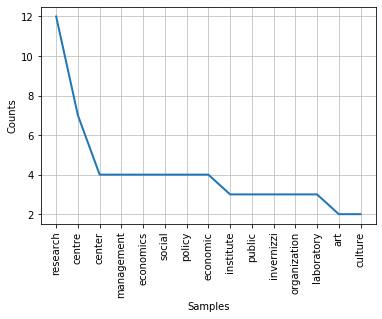

In [11]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [ ]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

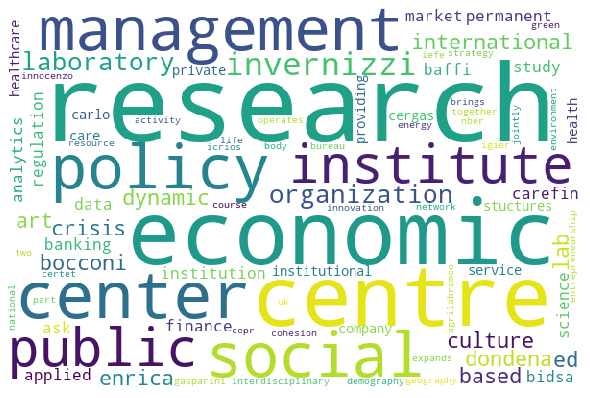

In [13]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

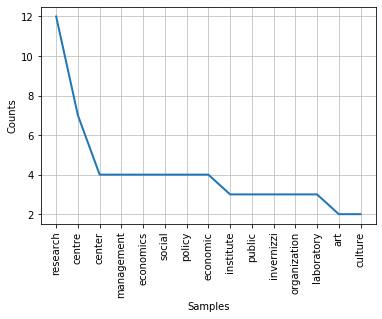

In [14]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

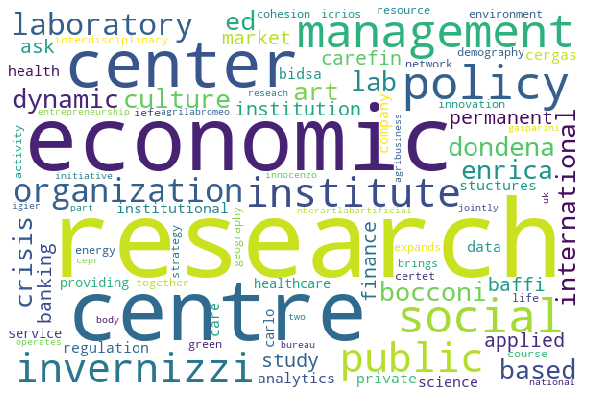

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## mutual information fra parola e centro di ricerca

In [16]:
from nltk import bigrams
import collections
import math
from math import log

#formula: PMI-IR (w1, w2) = log2 p(w1&w2)/p(w1)*p(w2); p=probability, w=word 

In [17]:
a1=tot_text.split()    
a2=collections.Counter(a1)
#a2= a2.most_common(15) 
a3=collections.Counter(bigrams(a2))
a4=sum([a2[x]for x in a2])
a5=sum([a3[x]for x in a3])
a6={x:float(a2[x])/a4 for x in a2} # word probabilities(w1 and w2)
a7={x:float(a3[x])/a5 for x in a3} # joint probabilites (w1&w2)
u = []
for x in a6:
    k={x:round(log(a7[b]/(a6[x] * a6[y]),2),4) for b in a7 for y in a6 if x and y in b}
    u.append(k)
    
u

[{'research': 4.4179},
 {'center': 6.0028},
 {'permanent': 8.0028},
 {'ask': 8.0028},
 {'centre': 5.1955},
 {'management': 6.0028},
 {'economics': 6.0028},
 {'art': 7.0028},
 {'culture': 7.0028},
 {'institution': 8.0028},
 {'study': 8.0028},
 {'baffi': 8.0028},
 {'carefin': 8.0028},
 {'applied': 8.0028},
 {'international': 7.0028},
 {'market': 8.0028},
 {'banking': 8.0028},
 {'finance': 8.0028},
 {'regulation': 8.0028},
 {'bidsa': 8.0028},
 {'bocconi': 7.0028},
 {'institute': 6.4179},
 {'data': 8.0028},
 {'science': 8.0028},
 {'analytics': 8.0028},
 {'cergas': 8.0028},
 {'health': 8.0028},
 {'social': 6.0028},
 {'care': 8.0028},
 {'institutional': 8.0028},
 {'stuctures': 8.0028},
 {'public': 6.4179},
 {'private': 8.0028},
 {'company': 8.0028},
 {'providing': 8.0028},
 {'healthcare': 8.0028},
 {'service': 8.0028},
 {'dondena': 7.0028},
 {'carlo': 8.0028},
 {'f': 8.0028},
 {'dynamic': 7.0028},
 {'policy': 6.0028},
 {'interdisciplinary': 8.0028},
 {'cohesion': 8.0028},
 {'demography': 8.0

In [18]:
values = [list(d.values())[0] for d in u]
values.sort()

Lista2 = []
for x in values:
    for d in u:
        val = list(d.values())[0]

        if x == val:
            Lista2.append({list(d.keys())[0]: x})
Lista2

[{'research': 4.4179},
 {'centre': 5.1955},
 {'center': 6.0028},
 {'management': 6.0028},
 {'economics': 6.0028},
 {'social': 6.0028},
 {'policy': 6.0028},
 {'economic': 6.0028},
 {'center': 6.0028},
 {'management': 6.0028},
 {'economics': 6.0028},
 {'social': 6.0028},
 {'policy': 6.0028},
 {'economic': 6.0028},
 {'center': 6.0028},
 {'management': 6.0028},
 {'economics': 6.0028},
 {'social': 6.0028},
 {'policy': 6.0028},
 {'economic': 6.0028},
 {'center': 6.0028},
 {'management': 6.0028},
 {'economics': 6.0028},
 {'social': 6.0028},
 {'policy': 6.0028},
 {'economic': 6.0028},
 {'center': 6.0028},
 {'management': 6.0028},
 {'economics': 6.0028},
 {'social': 6.0028},
 {'policy': 6.0028},
 {'economic': 6.0028},
 {'center': 6.0028},
 {'management': 6.0028},
 {'economics': 6.0028},
 {'social': 6.0028},
 {'policy': 6.0028},
 {'economic': 6.0028},
 {'institute': 6.4179},
 {'public': 6.4179},
 {'invernizzi': 6.4179},
 {'organization': 6.4179},
 {'laboratory': 6.4179},
 {'institute': 6.4179},
